In [1]:
kaggle_url = 'https://www.kaggle.com/jboysen/london-crime/data'

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame, pivot_table

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
crorig = pd.read_csv('london_crime_by_lsoa.csv')

crorig.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [5]:
crorig.shape

(13490604, 7)

In [6]:
crorig.count().min() == crorig.shape[0] # no missing data

True

In [7]:
crorig['month'].unique()

array([11,  5,  3,  6,  7,  4,  9,  8, 12,  1, 10,  2], dtype=int64)

In [8]:
crorig['borough'].unique()

array(['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth',
       'Ealing', 'Hounslow', 'Newham', 'Sutton', 'Haringey', 'Lambeth',
       'Richmond upon Thames', 'Hillingdon', 'Havering',
       'Barking and Dagenham', 'Kingston upon Thames', 'Westminster',
       'Hackney', 'Enfield', 'Harrow', 'Lewisham', 'Brent', 'Southwark',
       'Barnet', 'Waltham Forest', 'Camden', 'Bexley',
       'Kensington and Chelsea', 'Islington', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Merton', 'City of London'], dtype=object)

In [9]:
crorig['borough'].value_counts()

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

In [10]:
crmonth = crorig.groupby('month').sum()[['value']]

In [11]:
crmonth

,value
month,
1,530247
2,500537
3,551795
4,520648
5,552704
6,549041
7,563076
8,532784
9,522377


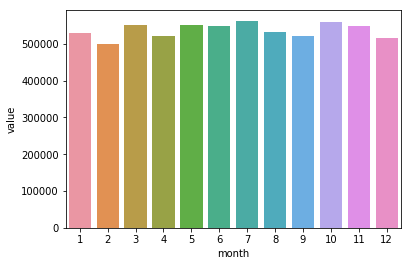

In [12]:
sns.barplot(x=crmonth.index,y=crmonth.value,data=crmonth)

In [13]:
cryear = crorig.groupby('year').sum()[['value']]

cryear

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


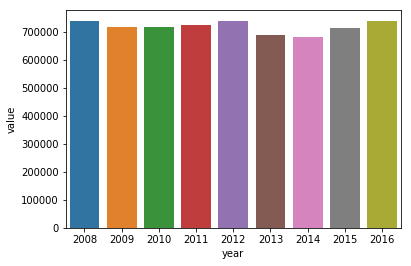

In [14]:
sns.barplot(x=cryear.index,y=cryear.value)

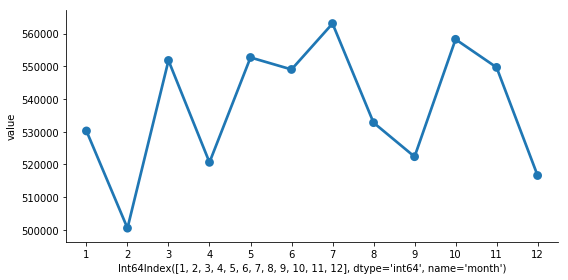

In [15]:
sns.factorplot(x=crmonth.index, y='value', data=crmonth, kind='point', aspect=2)

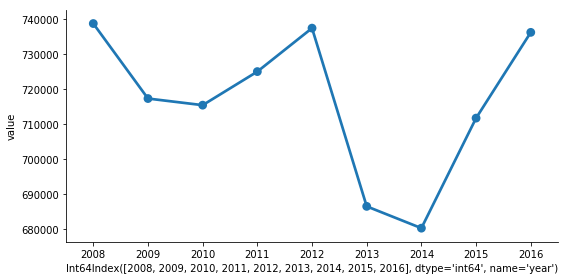

In [16]:
sns.factorplot(x=cryear.index, y='value', data=cryear, kind='point', aspect=2)

In [17]:
crorig.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [18]:
len(crorig['major_category'].unique())

9

In [19]:
len(crorig['minor_category'].unique())

32

In [20]:
# hue by major category

In [21]:
crcat = crorig.groupby('major_category').sum()[['value']]

In [22]:
crcat = crcat.sort_values(by=['value'],ascending=False)

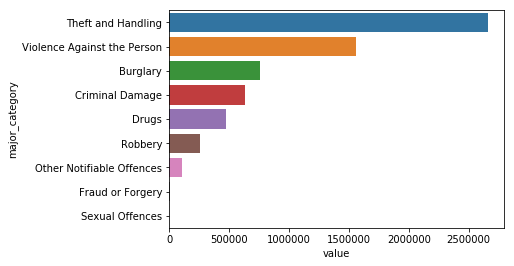

In [23]:
sns.barplot(x=crcat.value, y=crcat.index,data=crcat)

In [24]:
crbor = crorig.groupby('borough').sum()[['value']]

crbor = crbor.sort_values(by=['value'],ascending=False)

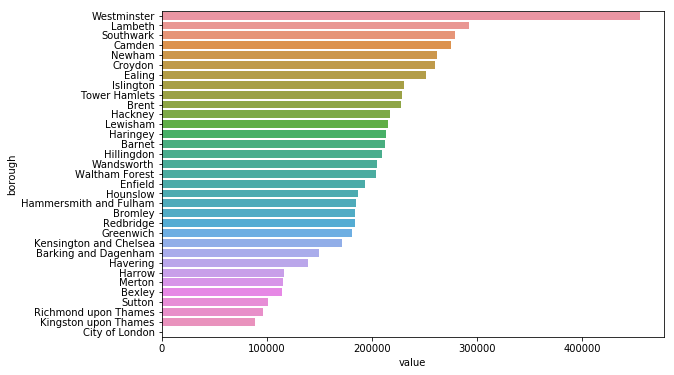

In [25]:
plt.figure(figsize=(9,6))

sns.barplot(x=crbor.value, y=crbor.index,data=crbor)

In [26]:
crtable = pivot_table(crorig, values='value', 
                      index=['year', 'month'],
                      columns=['major_category'],
                      aggfunc=np.sum)

In [27]:
crtable.head(15)

major_category  Burglary  Criminal Damage  Drugs  Fraud or Forgery  \
year month                                                           
2008 1              8396             8061   5230              2671   
     2              7296             7677   6071              2654   
     3              7485             7818   5769                 0   
     4              6827             8113   5158                 0   
     5              6889             8273   5868                 0   
     6              6989             7981   5366                 0   
     7              6983             7872   6062                 0   
     8              7163             7476   5971                 0   
     9              6607             7367   5815                 0   
     10             7229             7517   6334                 0   
     11             7759             7048   6034                 0   
     12             8469             6669   5126                 0   
2009 1              8662             6866   5287                 0   
     2              7107             6585   5016                 0   
     3              8143             7867   5718                 0   

major_category  Other Notifiable Offences  Robbery  Sexual Offences  \
year month                                                            
2008 1                                789     2887              652   
     2                                749     2455              621   
     3                                810     2585                0   
     4                                794     2498                0   
     5                                795     2490                0   
     6                                961     2448                0   
     7                                909     2390                0   
     8                                889     2275                0   
     9                                921     2206                0   
     10                               887     2520                0   
     11                               889     2588                0   
     12                               719     2285                0   
2009 1                                861     2592                0   
     2                                775     2349                0   
     3                                962     2612                0   

major_category  Theft and Handling  Violence Against the Person  
year month                                                       
2008 1                       24014                        12719  
     2                       22980                        12123  
     3                       23632                        13244  
     4                       23660                        12590  
     5                       23695                        14577  
     6                       23794                        14751  
     7                       24814                        15096  
     8                       22791                        13394  
     9                       22738                        12760  
     10                      25478                        13389  
     11                      24008                        13069  
     12                      22088                        12132  
2009 1                       22332                        12542  
     2                       20819                        12055  
     3                       24219                        13961

In [28]:
crtable2 = pivot_table(crorig, values='value', 
                      index=['year', 'major_category'], 
                      aggfunc=np.sum)

In [29]:
crtable2.head(10)

value
year major_category                     
2008 Burglary                      88092
     Criminal Damage               91872
     Drugs                         68804
     Fraud or Forgery               5325
     Other Notifiable Offences     10112
     Robbery                       29627
     Sexual Offences                1273
     Theft and Handling           283692
     Violence Against the Person  159844
2009 Burglary                      90619

In [30]:
crtable2 = crtable2.reset_index() #need to reset index to plot pivot table

crtable2.head(10)

,year,major_category,value
0,2008,Burglary,88092
1,2008,Criminal Damage,91872
2,2008,Drugs,68804
3,2008,Fraud or Forgery,5325
4,2008,Other Notifiable Offences,10112
5,2008,Robbery,29627
6,2008,Sexual Offences,1273
7,2008,Theft and Handling,283692
8,2008,Violence Against the Person,159844
9,2009,Burglary,90619


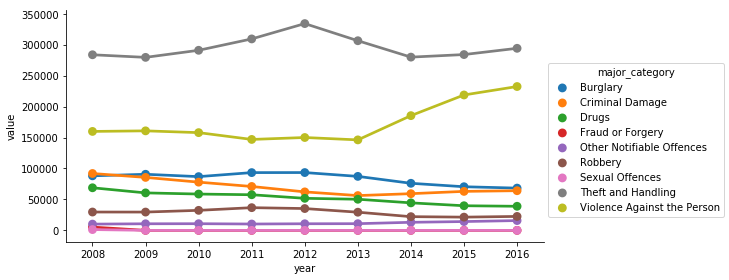

In [31]:
sns.factorplot(x='year',y='value',data=crtable2, hue='major_category', aspect=2)

In [32]:
crorig.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [33]:
crtable.head()

major_category  Burglary  Criminal Damage  Drugs  Fraud or Forgery  \
year month                                                           
2008 1              8396             8061   5230              2671   
     2              7296             7677   6071              2654   
     3              7485             7818   5769                 0   
     4              6827             8113   5158                 0   
     5              6889             8273   5868                 0   

major_category  Other Notifiable Offences  Robbery  Sexual Offences  \
year month                                                            
2008 1                                789     2887              652   
     2                                749     2455              621   
     3                                810     2585                0   
     4                                794     2498                0   
     5                                795     2490                0   

major_category  Theft and Handling  Violence Against the Person  
year month                                                       
2008 1                       24014                        12719  
     2                       22980                        12123  
     3                       23632                        13244  
     4                       23660                        12590  
     5                       23695                        14577

In [34]:
crtable3 = pivot_table(crorig, values='value', index=['year', 'month', 'major_category'], aggfunc=np.sum)

crtable3.head()

value
year month major_category                  
2008 1     Burglary                    8396
           Criminal Damage             8061
           Drugs                       5230
           Fraud or Forgery            2671
           Other Notifiable Offences    789

In [35]:
crtable3 = crtable3.reset_index()

crtable3.head()

,year,month,major_category,value
0,2008,1,Burglary,8396
1,2008,1,Criminal Damage,8061
2,2008,1,Drugs,5230
3,2008,1,Fraud or Forgery,2671
4,2008,1,Other Notifiable Offences,789


In [36]:
def combine_ym (x):
    if x.month > 9:
        return str(x.year) + str(x.month)
    else:
        return str(x.year) + '0' + str(x.month)

In [37]:
crtable3['yearmonth'] = crtable3.apply(combine_ym, axis=1)

In [38]:
crtable3.tail()

,year,month,major_category,value,yearmonth
967,2016,12,Other Notifiable Offences,1171,201612
968,2016,12,Robbery,2238,201612
969,2016,12,Sexual Offences,0,201612
970,2016,12,Theft and Handling,25728,201612
971,2016,12,Violence Against the Person,18782,201612


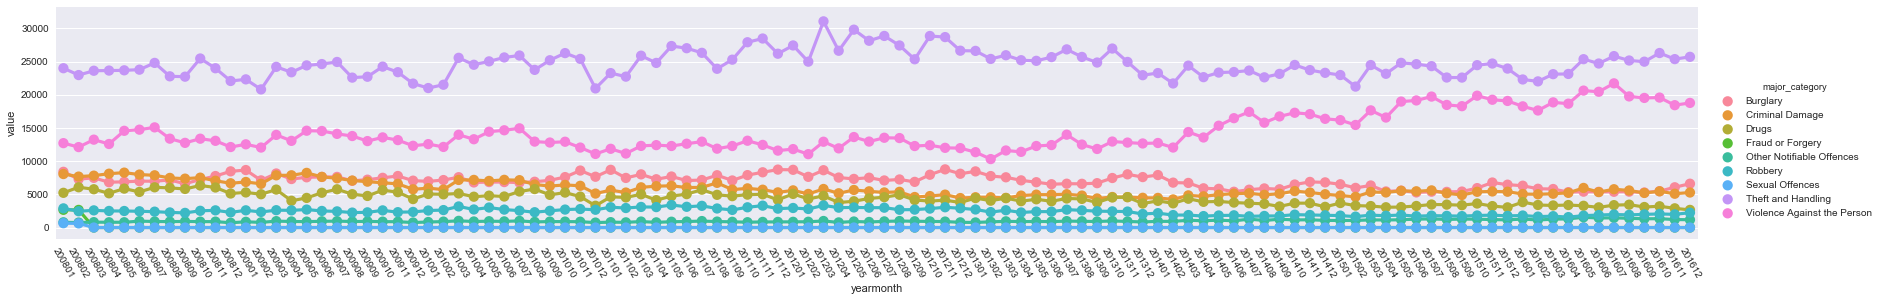

In [39]:
sns.set()
sns.factorplot(x='yearmonth',y='value',data=crtable3,hue='major_category',aspect=6)

plt.xticks(rotation=-60)
plt.show()

In [40]:
crtable4 = pivot_table(crorig,values='value',index=['month','major_category'],aggfunc=np.sum)
crtable4 = crtable4.reset_index()

crtable4.head(15)

,month,major_category,value
0,1,Burglary,70608
1,1,Criminal Damage,50991
2,1,Drugs,41239
3,1,Fraud or Forgery,2671
4,1,Other Notifiable Offences,8178
5,1,Robbery,22533
6,1,Sexual Offences,652
7,1,Theft and Handling,213302
8,1,Violence Against the Person,120073
9,2,Burglary,63008


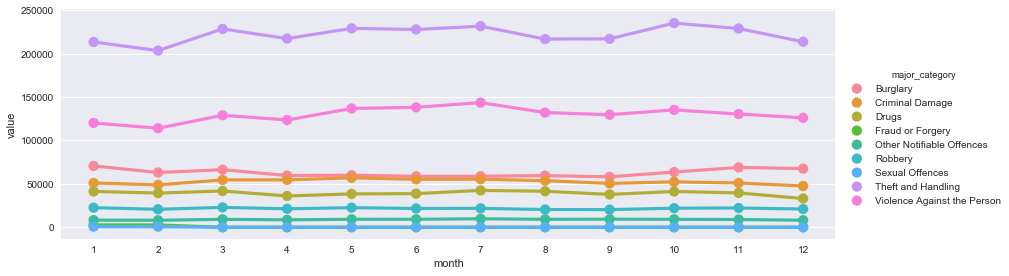

In [41]:
sns.factorplot(x='month',y='value',data=crtable4,hue='major_category',aspect=3)

In [42]:
crorig.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [43]:
crtable5 = pivot_table(crorig, values='value', index=['year','month','borough','major_category'],aggfunc=np.sum)
crtable5 = crtable5.reset_index()

crtable5.head(15)

,year,month,borough,major_category,value
0,2008,1,Barking and Dagenham,Burglary,134
1,2008,1,Barking and Dagenham,Criminal Damage,286
2,2008,1,Barking and Dagenham,Drugs,92
3,2008,1,Barking and Dagenham,Fraud or Forgery,90
4,2008,1,Barking and Dagenham,Other Notifiable Offences,14
5,2008,1,Barking and Dagenham,Robbery,50
6,2008,1,Barking and Dagenham,Sexual Offences,17
7,2008,1,Barking and Dagenham,Theft and Handling,492
8,2008,1,Barking and Dagenham,Violence Against the Person,440
9,2008,1,Barnet,Burglary,367


In [44]:
crtable5['yearmonth'] = crtable5.apply(combine_ym,axis=1)

crtable5.head()

,year,month,borough,major_category,value,yearmonth
0,2008,1,Barking and Dagenham,Burglary,134,200801
1,2008,1,Barking and Dagenham,Criminal Damage,286,200801
2,2008,1,Barking and Dagenham,Drugs,92,200801
3,2008,1,Barking and Dagenham,Fraud or Forgery,90,200801
4,2008,1,Barking and Dagenham,Other Notifiable Offences,14,200801


In [45]:
# all plots displayed on one row; need to use subplots
#cfplot = sns.factorplot(x='year',y='value',data=crtable5,hue='borough',col='borough',sharex=False)

In [46]:
crbor.head(5)

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024


In [47]:
cr_westminster = crtable5[crtable5['borough'] == 'Westminster']

In [48]:
cr_westminster.tail()

,year,month,borough,major_category,value,yearmonth
31855,2016,12,Westminster,Other Notifiable Offences,44,201612
31856,2016,12,Westminster,Robbery,221,201612
31857,2016,12,Westminster,Sexual Offences,0,201612
31858,2016,12,Westminster,Theft and Handling,2868,201612
31859,2016,12,Westminster,Violence Against the Person,963,201612


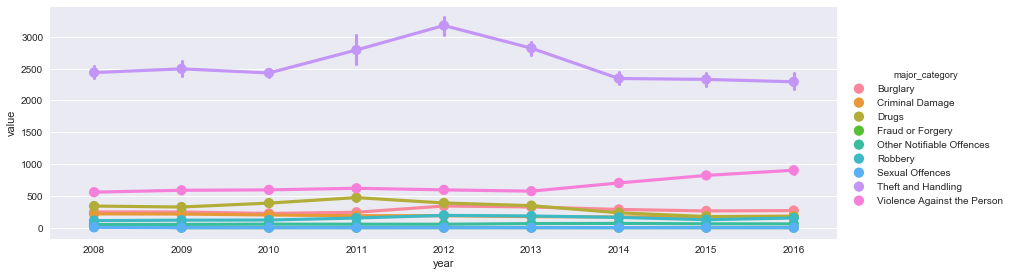

In [49]:
sns.factorplot(x='year', y='value', data=cr_westminster, hue='major_category',aspect=3)

In [50]:
cr_lambeth = crtable5[crtable5['borough'] == 'Lambeth']

cr_lambeth.tail()

,year,month,borough,major_category,value,yearmonth
31756,2016,12,Lambeth,Other Notifiable Offences,42,201612
31757,2016,12,Lambeth,Robbery,113,201612
31758,2016,12,Lambeth,Sexual Offences,0,201612
31759,2016,12,Lambeth,Theft and Handling,1040,201612
31760,2016,12,Lambeth,Violence Against the Person,783,201612


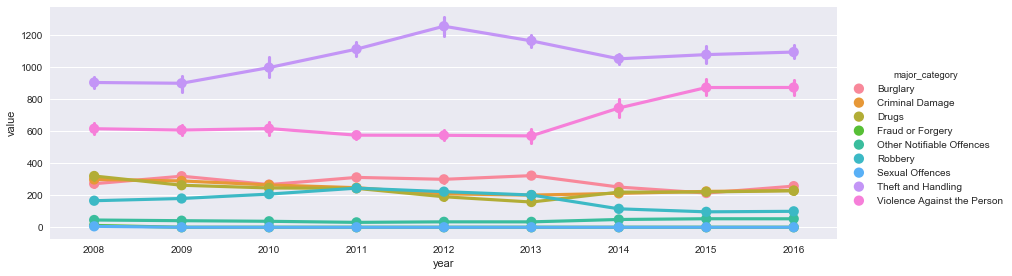

In [51]:
sns.factorplot(x='year', y='value', data=cr_lambeth, hue='major_category',aspect=3)

In [52]:
cr_southwark = crtable5[crtable5['borough'] == 'Southwark']

cr_southwark.tail()

,year,month,borough,major_category,value,yearmonth
31810,2016,12,Southwark,Other Notifiable Offences,40,201612
31811,2016,12,Southwark,Robbery,135,201612
31812,2016,12,Southwark,Sexual Offences,0,201612
31813,2016,12,Southwark,Theft and Handling,1048,201612
31814,2016,12,Southwark,Violence Against the Person,739,201612


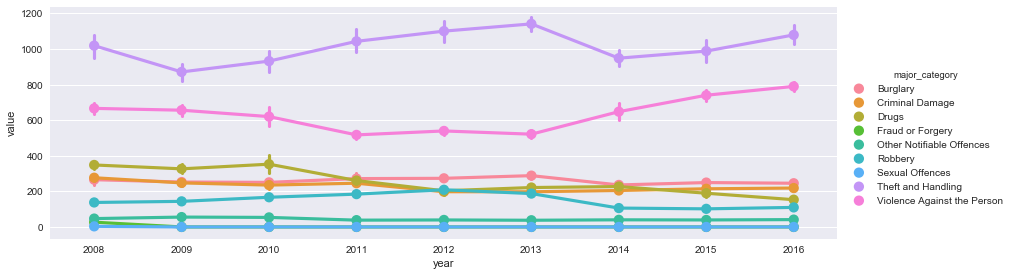

In [53]:
sns.factorplot(x='year', y='value', data=cr_southwark, hue='major_category',aspect=3)

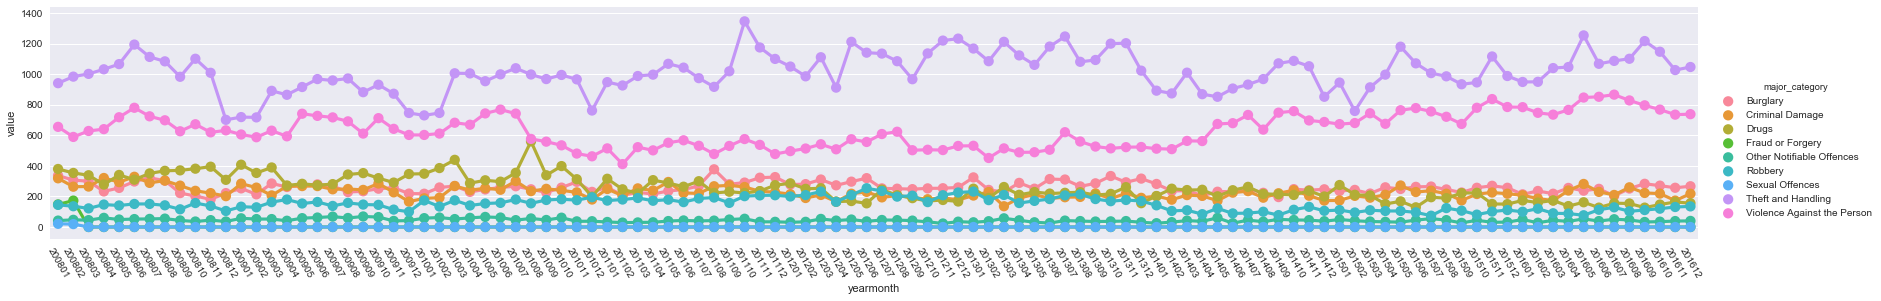

In [54]:
sns.factorplot(x='yearmonth', y='value', data=cr_southwark, kind='point', hue='major_category',aspect=6)

plt.xticks(rotation=-60)
plt.show()

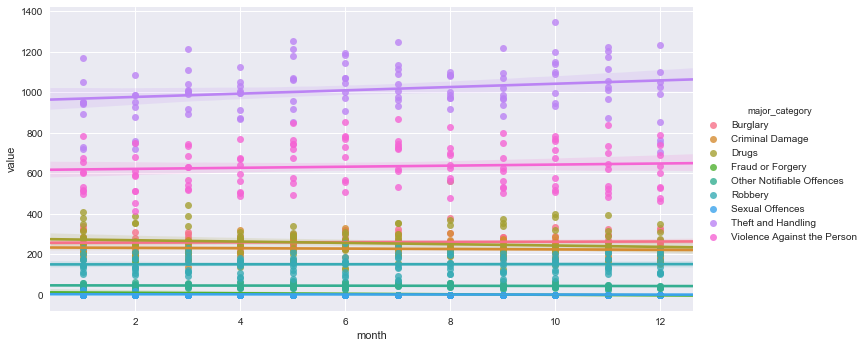

In [55]:
sns.lmplot(x='month',y='value',data=cr_southwark,hue='major_category',aspect=2)

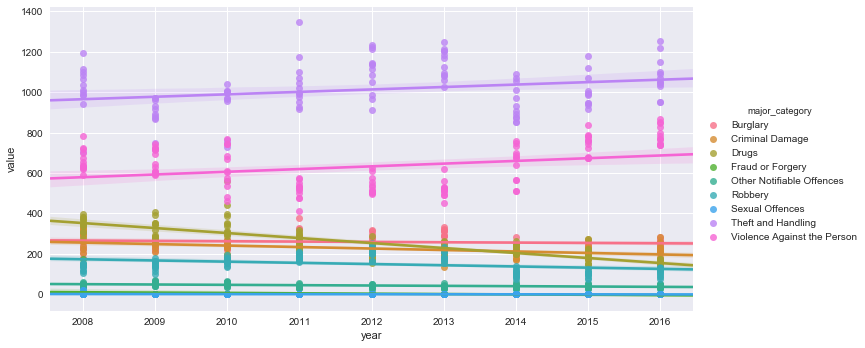

In [56]:
sns.lmplot(x='year',y='value',data=cr_southwark,hue='major_category',aspect=2)

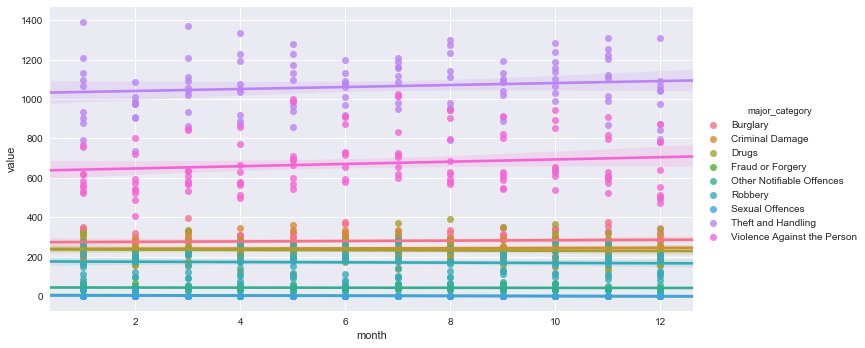

In [57]:
sns.lmplot(x='month',y='value',data=cr_lambeth,hue='major_category',aspect=2)

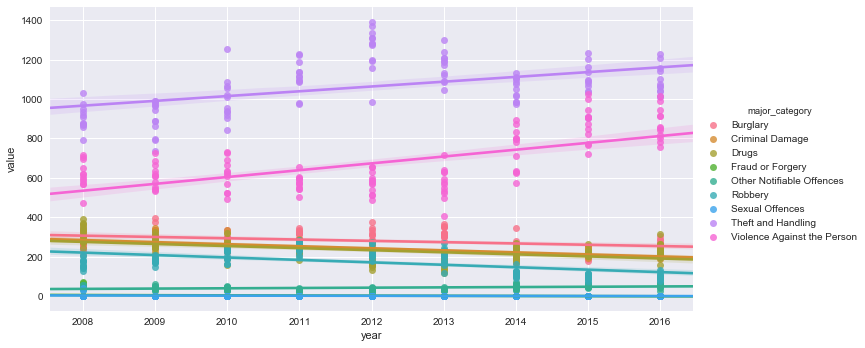

In [58]:
sns.lmplot(x='year',y='value',data=cr_lambeth,hue='major_category',aspect=2)

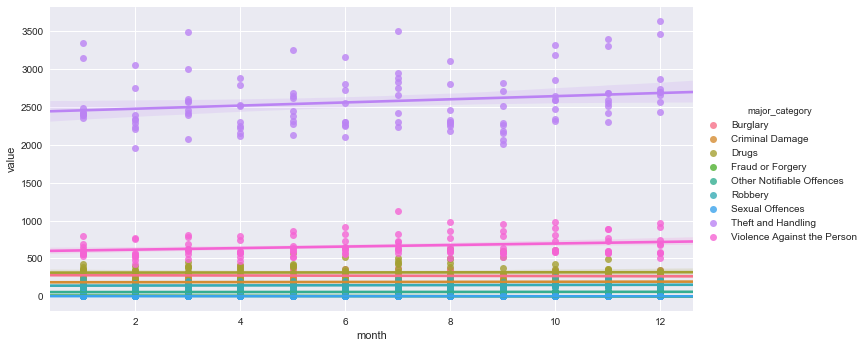

In [59]:
sns.lmplot(x='month',y='value',data=cr_westminster,hue='major_category',aspect=2)

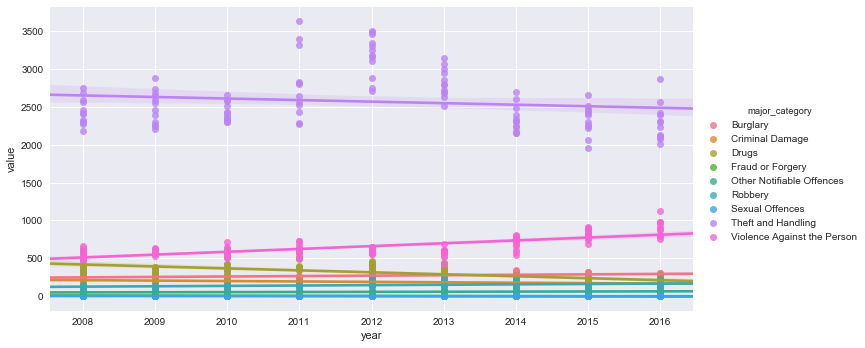

In [60]:
sns.lmplot(x='year',y='value',data=cr_westminster,hue='major_category',aspect=2)